# Task 4.9: Intro to Data Visualization with Python

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import Data

In [2]:
# folder path
path = r'C:\Users\jpelc\Documents\01-2023 Instacart Basket Analysis'

In [3]:
# importing pickle file 
df_ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ords_prods_custm.pkl'))

In [4]:
#checking imported file 
df_ords_prods.shape

(32404859, 31)

In [5]:
df_ords_prods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_price           float64 
 21  spendi

### 2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

<AxesSubplot:>

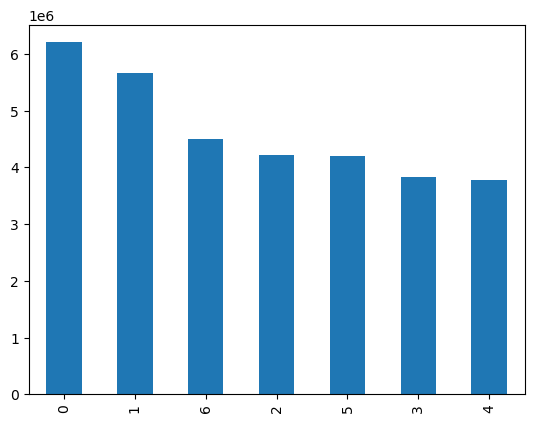

In [6]:
# creating  bar charts
df_ords_prods['orders_day_of_week'].value_counts().plot.bar()

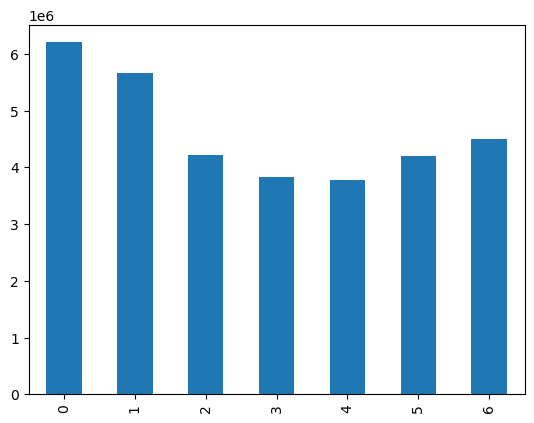

In [7]:
# saving chart and indexing
bar_ords_week = df_ords_prods['orders_day_of_week'].value_counts().sort_index().plot.bar()

#### Histogram

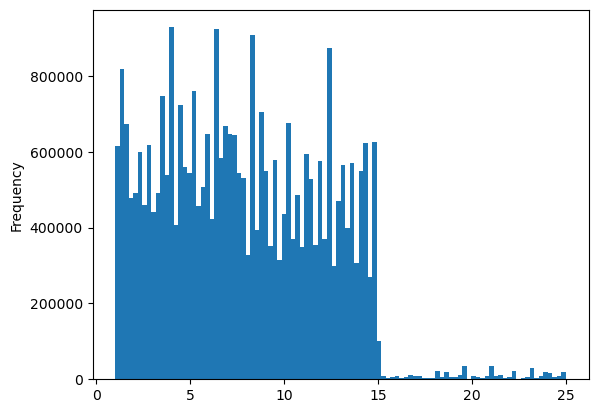

In [8]:
# prices histogram
hist_prices = df_ords_prods['prices'].plot.hist(bins = 100)

#### Scatterplot

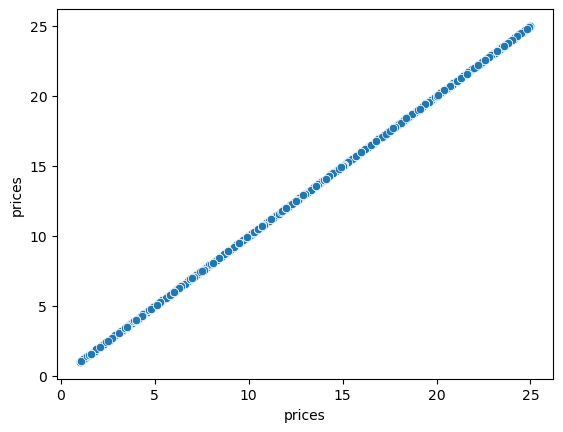

In [9]:
# prices scatterplot
scatterplot_prices = sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods)

In [10]:
# creating a 70/30 split out of random floating numbers
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods)) <= 0.7

In [ ]:
# separating data by creating big and small samples 
big_sample = df_ords_prods[dev]

In [ ]:
small_sample = df_ords_prods[~dev]

In [ ]:
#checking amount of rows of the list
len(dev)

In [ ]:
# checking if the sum of both creates same length
len(big_sample) + len(small_sample)

In [ ]:
# creating a subset data frame for our line chart
df_small = small_sample[['orders_day_of_week','prices']]

In [ ]:
# creating a line chart
line_day_prices = sns.lineplot(data = df_small, x = 'orders_day_of_week',y = 'prices')

### 3. you need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.¶

In [ ]:
# creating a histogram
hist_order = df_ords_prods['order_hour_of_day'].plot.hist(bins = 150)

#### Hystogram above shows us the frequency of orders per hour in the data frame.
#### Highest frequency hours seem to be 9am to 5pm.

### 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

In [ ]:
# creating a bar chart
bar_loyal= df_ords_prods['loyalty_flag'].value_counts().plot.bar(color = ['blue', 'grey', 'pink'])

#### The bar chart shows the distribution of customers by loyalty flag.

### 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [ ]:
# creating a line chart. For this first we need a subset df
df_order_hour_prices = small_sample[['order_hour_of_day','prices']]

In [ ]:
# checking df
df_order_hour_prices.head()

In [ ]:
# creating a line chart of hour and prices
line_hour_prices = sns.lineplot(data = df_order_hour_prices, x = 'order_hour_of_day',y = 'prices')

### 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In [ ]:
#creating subset for the line chart 
df_age_dep = small_sample[['age','num_dependants']]

In [ ]:
df_age_dep.head()

In [ ]:
# creating line chart of number of dependants by age
line_age_dep = sns.lineplot(data = df_age_dep, x = 'age',y = 'num_dependants')

#### The above line chart shows how many dependants each customer has by what age they are. There seems to be no clear patern, but all ages seem to fluctuate between 1.5 dependants

### 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In [ ]:
# defining df subset for scatterplot
df_age_income = small_sample[['age','income']]

In [ ]:
# creating scatterplot
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_age_income)

##### The scatter plot shows how much income each customer makes, by how old they are.  There appears to be correlation between age and income. From ages 40+ the income is higher.

### 8. Export your visualizations as “.png” files in your relevant project folder.

In [ ]:
bar_ords_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ords_week.png'))

In [ ]:
hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '04.04_hist_prices.png'))

In [ ]:
scatterplot_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '04.04_scatterplot_prices.png'))

In [ ]:
line_day_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '04.04_line_chart_day_prices.png'))

In [ ]:
hist_order.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '04.04_hist_order_hour_day.png'))

In [ ]:
bar_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '04.04_bar_loyalty_customers.png'))

In [ ]:
line_hour_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '04.04_line_chart_hour_prices.png'))

In [ ]:
line_age_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '04.04_line_chart_age_dependants.png'))

In [ ]:
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '04.04_scatterplot_age_income.png'))